<a href="https://colab.research.google.com/github/uuuu1112/BeTrue/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt

fatal: destination path 'Stocker' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import warnings

### 去除煩人的 warrning
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
from datetime import *
import requests

url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockPrice",
    "data_id": "2618",
    "start_date": "2000-01-01",
    "end_date": "2022-05-30",
    "token": "", # 參考登入，獲取金鑰
}
resp = requests.get(url, params=parameter)
data = resp.json()
data = pd.DataFrame(data["data"])
data['date']=data['date'].map(lambda x:datetime.strptime(x,"%Y-%m-%d"))
data.set_index('date',inplace=True)
df=data[['close']]
price=df.squeeze()
price.head()

date
2001-09-19    8.65
2001-09-20    8.35
2001-09-21    8.10
2001-09-24    7.55
2001-09-25    7.05
Name: close, dtype: float64

In [ ]:
from Stocker.stocker import Stocker
stock = Stocker(price)

the stock Stocker Initialized. Data covers 2001-09-19 00:00:00 to 2022-05-30 00:00:00.


Predicted Price on 2022-08-28 00:00:00 = $40.64


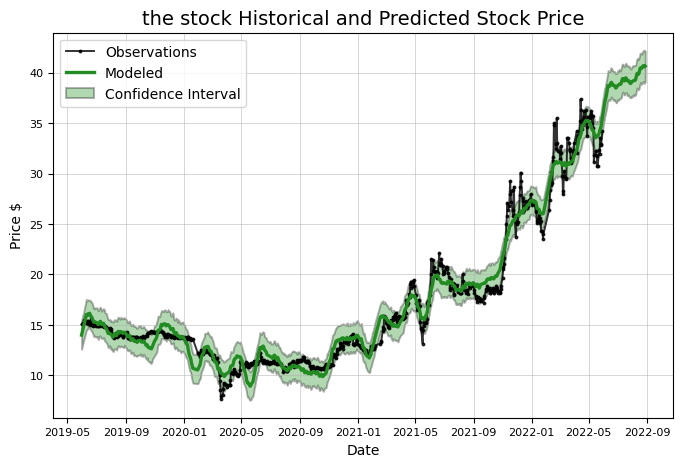

In [ ]:
model, model_data = stock.create_prophet_model(days=90)


Prediction Range: 2021-05-30 00:00:00 to 2022-05-30 00:00:00.

Predicted price on 2022-05-28 00:00:00 = $25.79.
Actual price on    2022-05-27 00:00:00 = $32.90.

Average Absolute Error on Training Data = $0.42.
Average Absolute Error on Testing  Data = $4.21.

When the model predicted an increase, the price increased 50.32% of the time.
When the model predicted a  decrease, the price decreased  44.19% of the time.

The actual value was within the 80% confidence interval 20.49% of the time.


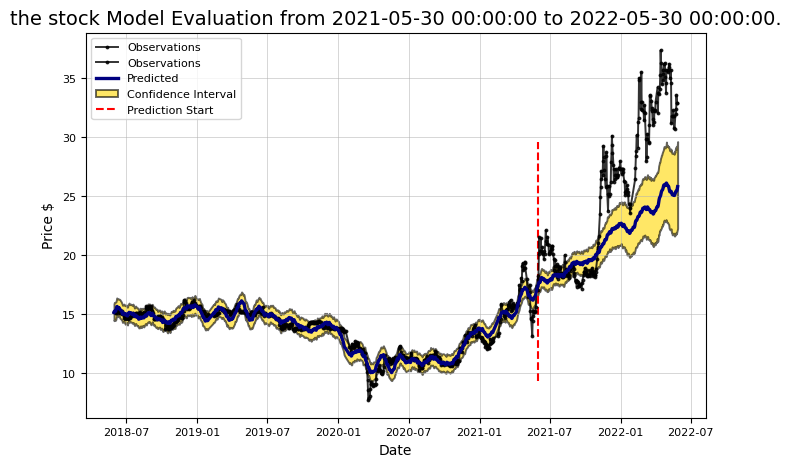

In [ ]:
stock.evaluate_prediction()

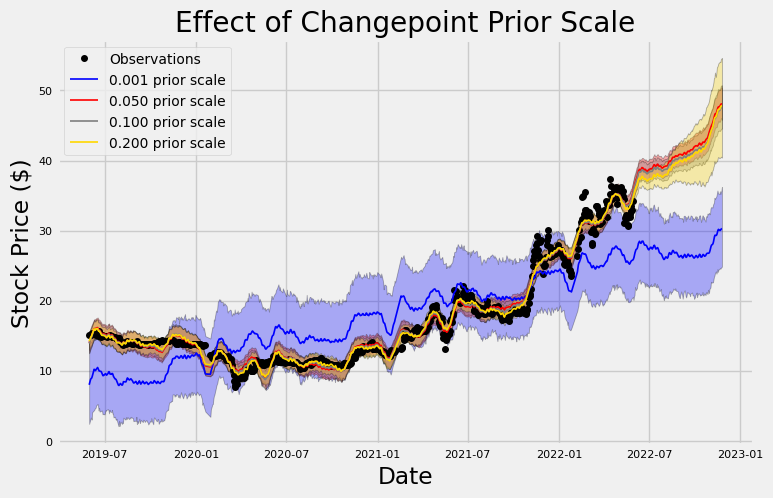

In [ ]:
stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])


Predicted Increase: 

         Date   estimate    change      upper      lower
1  2022-05-31  34.966897  0.315840  36.198016  33.676231
2  2022-06-01  35.251224  0.284327  36.518837  33.891900
3  2022-06-02  35.518773  0.267548  36.756588  34.194446
4  2022-06-03  35.777632  0.258859  36.931705  34.538795
6  2022-06-05  36.180267  0.402636  37.367714  34.826327
7  2022-06-06  36.312042  0.131775  37.482833  35.101663
8  2022-06-07  36.465496  0.153454  37.792822  35.227777
9  2022-06-08  36.704045  0.238549  37.973167  35.514727
10 2022-06-09  37.022163  0.318118  38.289376  35.767765
11 2022-06-10  37.326902  0.304739  38.494136  35.968710
13 2022-06-12  37.498624  0.171722  38.773862  36.210398
16 2022-06-15  37.407335  0.073121  38.621019  36.162680
17 2022-06-16  37.585547  0.178212  38.891087  36.329418
18 2022-06-17  37.741759  0.156212  39.046282  36.484800
23 2022-06-22  37.354685  0.004734  38.756567  36.061129
24 2022-06-23  37.407134  0.052449  38.724407  36.138556
25 2022-

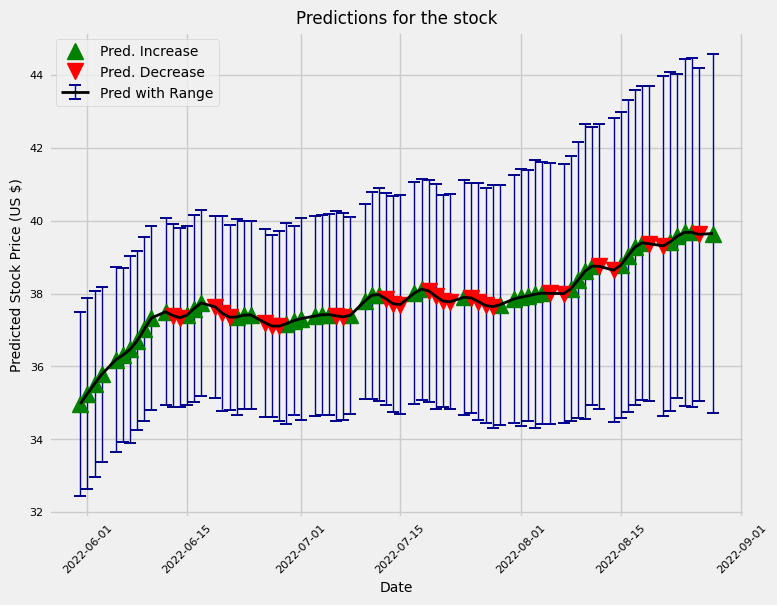

In [ ]:
stock.predict_future(days=90)